# CNN Practice
- Use Conv2D
- Overfitting
- Dropout

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.layers import *
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical

/home/sitibanc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data Preprocessing

In [2]:
# Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize
x_train = x_train / 255
x_test = x_test / 255
# Reshape Images
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# Get One-Hot Labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Without Dropout

### Build Model

In [3]:
model0 = Sequential()
model0.add(Conv2D(input_shape=(28, 28, 1), filters=16, kernel_size=3, padding="same", activation="relu"))
model0.add(Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"))
model0.add(Flatten())
model0.add(Dense(10, activation="softmax"))

model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
Total params: 64,050
Trainable params: 64,050
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [4]:
model0.compile(optimizer="adam", loss="categorical_crossentropy")
history0 = model0.fit(x_train[:1000], y_train[:1000],  batch_size=256, epochs=100, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2293 - val_loss: 2.0426
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8975 - val_loss: 1.6813
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.4796 - val_loss: 1.2538
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0388 - val_loss: 0.8847
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7138 - val_loss: 0.6652
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5265 - val_loss: 0.5582
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4337 - val_loss: 0.4974
Epoch 8/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3794 - val_loss: 0.4523
Epoch 9/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3364 - val_loss: 0.4491
Epoch 10/100
1000/1000 [

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0015 - val_loss: 0.7757
Epoch 80/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0014 - val_loss: 0.7770
Epoch 81/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0014 - val_loss: 0.7791
Epoch 82/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0014 - val_loss: 0.7823
Epoch 83/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 0.7857
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 0.7884
Epoch 85/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 0.7903
Epoch 86/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0012 - val_loss: 0.7932
Epoch 87/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0012 - val_loss: 0.7953
Epoch 88/100
1000/1000 [==============================] - 2s 2ms/step - loss:

### Plot Result

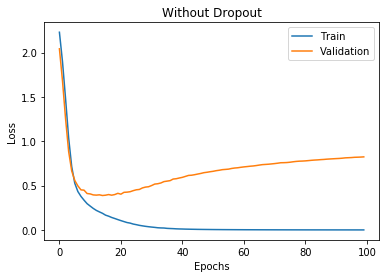

In [5]:
plt.plot(history0.history["loss"], label="Train")
plt.plot(history0.history["val_loss"], label="Validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Without Dropout")
plt.show()

## With Dropout

### Build Model

In [6]:
model1 = Sequential()
model1.add(Conv2D(input_shape=(28, 28, 1), filters=16, kernel_size=3, padding="same", activation="relu"))
model1.add(Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"))
model1.add(Flatten())
model1.add(Dropout(0.25))
model1.add(Dense(10, activation="softmax"))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                62730     
Total params: 64,050
Trainable params: 64,050
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [7]:
model1.compile(optimizer="adam", loss="categorical_crossentropy")
history1 = model1.fit(x_train[:1000], y_train[:1000],  batch_size=256, epochs=100, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 2.1973 - val_loss: 1.9574
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7735 - val_loss: 1.5156
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2951 - val_loss: 1.0682
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8897 - val_loss: 0.7733
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6400 - val_loss: 0.6198
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5047 - val_loss: 0.5531
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4372 - val_loss: 0.5028
Epoch 8/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3993 - val_loss: 0.4843
Epoch 9/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3539 - val_loss: 0.4506
Epoch 10/100
1000/1000 [

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0060 - val_loss: 0.7367
Epoch 80/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0062 - val_loss: 0.7513
Epoch 81/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0067 - val_loss: 0.7458
Epoch 82/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.7614
Epoch 83/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0136 - val_loss: 0.7544
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0056 - val_loss: 0.7436
Epoch 85/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0060 - val_loss: 0.7365
Epoch 86/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0052 - val_loss: 0.7491
Epoch 87/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0069 - val_loss: 0.7601
Epoch 88/100
1000/1000 [==============================] - 2s 2ms/step - loss:

### Plot Result

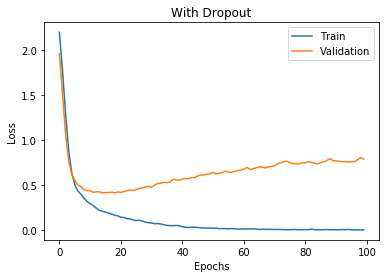

In [8]:
plt.plot(history1.history["loss"], label="Train")
plt.plot(history1.history["val_loss"], label="Validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("With Dropout")
plt.show()

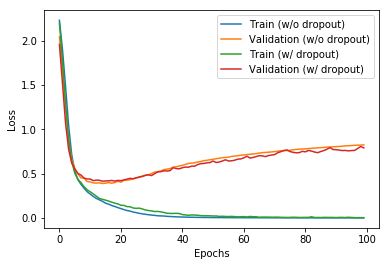

In [9]:
plt.plot(history0.history["loss"], label="Train (w/o dropout)")
plt.plot(history0.history["val_loss"], label="Validation (w/o dropout)")
plt.plot(history1.history["loss"], label="Train (w/ dropout)")
plt.plot(history1.history["val_loss"], label="Validation (w/ dropout)")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()